In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Step 02= DATA UNDERSTANDING AND CLEANING

df.info()
df.describe()

df.isnull().sum()

df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


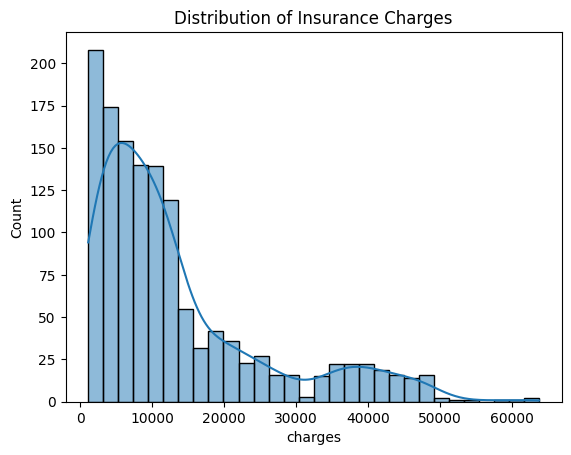

In [ ]:
# STEP 03=EDA
# Visualize charges distribution
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


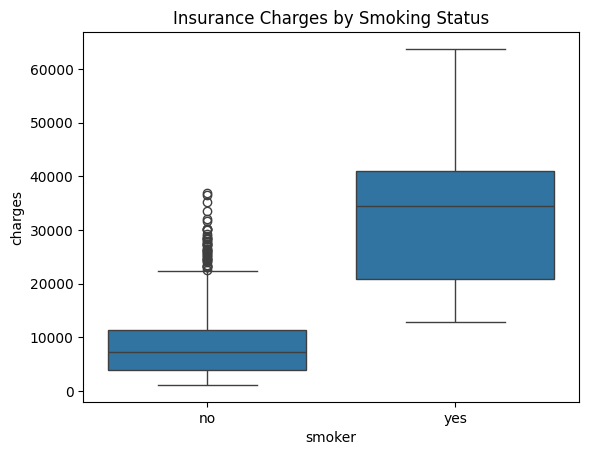

In [ ]:
# Boxplot for smoker vs charges
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoking Status")
plt.show()

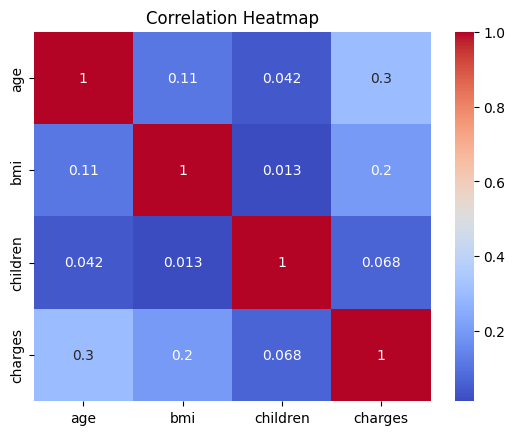

In [ ]:
# Correlation heatmap

# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number)
corr_matrix = numerical_cols.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Step 4: Hypothesis Testing
# 1. t-Test (Smokers vs Non-Smokers) =
smokers = df[df['smoker']=='yes']['charges']
non_smokers = df[df['smoker']=='no']['charges']
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)
print("t-stat:", t_stat, "p-value:", p_value)


t-stat: 46.66492117272371 p-value: 8.271435842179102e-283


In [ ]:
# 2. ANOVA (Regions vs Charges)
groups = [df[df['region']==r]['charges'] for r in df['region'].unique()]
f_stat, p_val = stats.f_oneway(*groups)
print("F-stat:", f_stat, "p-value:", p_val)


F-stat: 2.96962669358912 p-value: 0.0308933560705201


In [ ]:
# 3. Chi-Square Test (Sex vs Smoker)
contingency = pd.crosstab(df['sex'], df['smoker'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("Chi2:", chi2, "p-value:", p)


Chi2: 7.39291081459996 p-value: 0.006548143503580696


In [ ]:
# Correlation with charges
df[['age','bmi','charges']].corr()


,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000
